In [1]:
import pandas as pd
import numpy as np
import dash
from dash import html
from dash import dcc
import matplotlib.pyplot as plt
from datetime import datetime
import plotly.graph_objects as go
from scipy import optimize, integrate
from dash.dependencies import Input, Output,State

In [2]:
data = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv'
data_1 = pd.read_csv(data)
data_1.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,7/19/22,7/20/22,7/21/22,7/22/22,7/23/22,7/24/22,7/25/22,7/26/22,7/27/22,7/28/22
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,183908,184038,184224,184360,184473,184587,184819,185086,185272,185393
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,298578,300058,301394,302767,303925,304890,305123,306789,308050,309278
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,266542,266591,266654,266700,266772,266839,266916,267010,267096,267194
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,45061,45061,45326,45326,45326,45326,45326,45326,45326,45508
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,102209,102209,102209,102301,102301,102301,102301,102301,102301,102301


In [3]:
country_data = pd.read_csv(data)
country_data.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,7/19/22,7/20/22,7/21/22,7/22/22,7/23/22,7/24/22,7/25/22,7/26/22,7/27/22,7/28/22
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,183908,184038,184224,184360,184473,184587,184819,185086,185272,185393
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,298578,300058,301394,302767,303925,304890,305123,306789,308050,309278
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,266542,266591,266654,266700,266772,266839,266916,267010,267096,267194
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,45061,45061,45326,45326,45326,45326,45326,45326,45326,45508
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,102209,102209,102209,102301,102301,102301,102301,102301,102301,102301


In [4]:
time_idx = country_data.columns[4:]

In [5]:
data_small = pd.DataFrame({'date':time_idx})
data_small.head()

,date
0,1/22/20
1,1/23/20
2,1/24/20
3,1/25/20
4,1/26/20


In [6]:
country_list = ['France', 'Albania', 'US','Australia']

In [7]:
for each in country_list:
    data_small[each] =np.array(country_data[country_data['Country/Region']==each].iloc[:,4::].sum(axis=0))

In [8]:
data_small.head()

,date,France,Albania,US,Australia
0,1/22/20,0,0,1,0
1,1/23/20,0,0,1,0
2,1/24/20,2,0,2,0
3,1/25/20,3,0,2,0
4,1/26/20,3,0,5,4


In [9]:
time_idx = [datetime.strptime(each, "%m/%d/%y") for each in data_small.date] #to convert all the dates into datetime 
time_str= [each.strftime('%Y-%m-%d') for each in time_idx] #to convert datetime function to string

In [10]:
N0=4000000 #max susceptible population
beta=0.7   # infection spread dynamics
gamma=0.3  # recovery rate


# condition I0+S0+R0=N0
I0=data_small.France[70]
S0=N0-I0
R0=0

In [11]:
def SIR_model(SIR,beta,gamma):
    
    S,I,R=SIR
    dS_dt=-beta*S*I/N0          #S*I is the 
    dI_dt=beta*S*I/N0-gamma*I
    dR_dt=gamma*I
    return([dS_dt,dI_dt,dR_dt])

In [12]:
np.array([S0,I0,R0])

array([3942875,   57125,       0], dtype=int64)

In [13]:
SIR = np.array([S0,I0,R0])
propagation_rates=pd.DataFrame(columns={'susceptible':S0,
                                        'infected':I0,
                                        'recovered':R0})



for each_t in np.arange(100):
   
    new_delta_vec=SIR_model(SIR,beta,gamma)
   
    SIR=SIR+new_delta_vec
    
    propagation_rates=propagation_rates.append({'susceptible':SIR[0],
                                                'infected':SIR[1],
                                                'recovered':SIR[2]}, ignore_index= True)

C:\Users\TEMP.DESKTOP-IITHEH3.064\AppData\Local\Temp\ipykernel_11924\939615205.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  propagation_rates=propagation_rates.append({'susceptible':SIR[0],
C:\Users\TEMP.DESKTOP-IITHEH3.064\AppData\Local\Temp\ipykernel_11924\939615205.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  propagation_rates=propagation_rates.append({'susceptible':SIR[0],
C:\Users\TEMP.DESKTOP-IITHEH3.064\AppData\Local\Temp\ipykernel_11924\939615205.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  propagation_rates=propagation_rates.append({'susceptible':SIR[0],
C:\Users\TEMP.DESKTOP-IITHEH3.064\AppData\Local\Temp\ipykernel_11924\939615205.py:14: FutureWarning: The frame.append method is deprecated 

C:\Users\TEMP.DESKTOP-IITHEH3.064\AppData\Local\Temp\ipykernel_11924\939615205.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  propagation_rates=propagation_rates.append({'susceptible':SIR[0],
C:\Users\TEMP.DESKTOP-IITHEH3.064\AppData\Local\Temp\ipykernel_11924\939615205.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  propagation_rates=propagation_rates.append({'susceptible':SIR[0],
C:\Users\TEMP.DESKTOP-IITHEH3.064\AppData\Local\Temp\ipykernel_11924\939615205.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  propagation_rates=propagation_rates.append({'susceptible':SIR[0],
C:\Users\TEMP.DESKTOP-IITHEH3.064\AppData\Local\Temp\ipykernel_11924\939615205.py:14: FutureWarning: The frame.append method is deprecated 

C:\Users\TEMP.DESKTOP-IITHEH3.064\AppData\Local\Temp\ipykernel_11924\939615205.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  propagation_rates=propagation_rates.append({'susceptible':SIR[0],
C:\Users\TEMP.DESKTOP-IITHEH3.064\AppData\Local\Temp\ipykernel_11924\939615205.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  propagation_rates=propagation_rates.append({'susceptible':SIR[0],
C:\Users\TEMP.DESKTOP-IITHEH3.064\AppData\Local\Temp\ipykernel_11924\939615205.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  propagation_rates=propagation_rates.append({'susceptible':SIR[0],
C:\Users\TEMP.DESKTOP-IITHEH3.064\AppData\Local\Temp\ipykernel_11924\939615205.py:14: FutureWarning: The frame.append method is deprecated 

C:\Users\TEMP.DESKTOP-IITHEH3.064\AppData\Local\Temp\ipykernel_11924\939615205.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  propagation_rates=propagation_rates.append({'susceptible':SIR[0],
C:\Users\TEMP.DESKTOP-IITHEH3.064\AppData\Local\Temp\ipykernel_11924\939615205.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  propagation_rates=propagation_rates.append({'susceptible':SIR[0],
C:\Users\TEMP.DESKTOP-IITHEH3.064\AppData\Local\Temp\ipykernel_11924\939615205.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  propagation_rates=propagation_rates.append({'susceptible':SIR[0],
C:\Users\TEMP.DESKTOP-IITHEH3.064\AppData\Local\Temp\ipykernel_11924\939615205.py:14: FutureWarning: The frame.append method is deprecated 

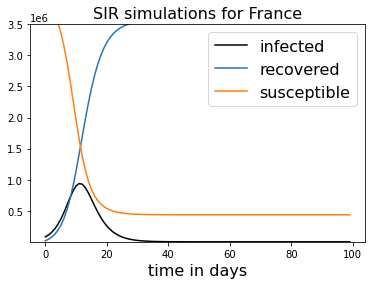

In [14]:
import matplotlib.pyplot as plt

fig, ax1 = plt.subplots(1, 1)

ax1.plot(propagation_rates.index,propagation_rates.infected,label='infected',color='k')
ax1.plot(propagation_rates.index,propagation_rates.recovered,label='recovered')
ax1.plot(propagation_rates.index,propagation_rates.susceptible,label='susceptible')

ax1.set_ylim(10, 3500000)
ax1.set_yscale('linear')
ax1.set_title('SIR simulations for France',size=16)
ax1.set_xlabel('time in days',size=16)
ax1.legend(loc='best',
           prop={'size': 16});

In [15]:
ydata = np.array(data_small.France[135:])
t=np.arange(len(ydata))
len(t)

784

In [16]:
I0=ydata[80]
S0=N0-I0
R0=0

In [17]:
def SIR_model_t(SIR,t,beta,gamma):
    
    S,I,R=SIR
    dS_dt=-beta*S*I/N0          #S*I is the 
    dI_dt=beta*S*I/N0-gamma*I
    dR_dt=gamma*I
    return dS_dt,dI_dt,dR_dt

In [18]:
def fit_odeint(x, beta, gamma):
    return integrate.odeint(SIR_model_t, (S0, I0, R0), t, args=(beta, gamma))[:,1]

In [19]:
popt=[0.5,0.2]
fit_odeint(t, *popt)

array([ 2.84474000e+05,  3.67299873e+05,  4.64622862e+05,  5.73468174e+05,
        6.88003040e+05,  7.99864842e+05,  8.99469117e+05,  9.78000082e+05,
        1.02932706e+06,  1.05107483e+06,  1.04454623e+06,  1.01376638e+06,
        9.64196241e+05,  9.01584623e+05,  8.31185634e+05,  7.57356584e+05,
        6.83444138e+05,  6.11845354e+05,  5.44151968e+05,  4.81318249e+05,
        4.23819819e+05,  3.71789102e+05,  3.25123695e+05,  2.83569268e+05,
        2.46780801e+05,  2.14366442e+05,  1.85917966e+05,  1.61031196e+05,
        1.39319077e+05,  1.20419479e+05,  1.03999315e+05,  8.97561252e+04,
        7.74179776e+04,  6.67422942e+04,  5.75140345e+04,  4.95435336e+04,
        4.26641988e+04,  3.67302020e+04,  3.16142515e+04,  2.72054973e+04,
        2.34075982e+04,  2.01369610e+04,  1.73211555e+04,  1.48974979e+04,
        1.28117932e+04,  1.10172263e+04,  9.47338578e+03,  8.14540964e+03,
        7.00323910e+03,  6.02096846e+03,  5.17627989e+03,  4.44995281e+03,
        3.82543873e+03,  

In [20]:
popt, pcov = optimize.curve_fit(fit_odeint, t, ydata)
perr = np.sqrt(np.diag(pcov))
    
print('standard deviation errors : ',str(perr), ' start infect:',ydata[0])
print("Optimal parameters: beta =", popt[0], " and gamma = ", popt[1])

standard deviation errors :  [1.44952982e-04 4.27687597e-05]  start infect: 192450
Optimal parameters: beta = 0.0035499041636462302  and gamma =  -0.0045820157406036245


In [21]:
fitted=fit_odeint(t, *popt)

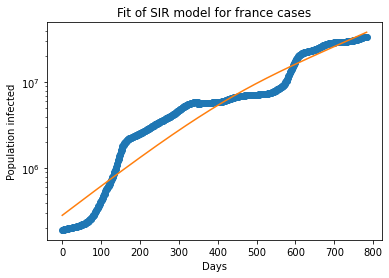

Optimal parameters: beta = 0.0035499041636462302  and gamma =  -0.0045820157406036245
Basic Reproduction Number R0  -0.7747472650931081
This ratio is derived as the expected number of new infections (these new infections are sometimes called secondary infections from a single infection in a population where all subjects are susceptible


In [22]:
plt.semilogy(t, ydata, 'o')
plt.semilogy(t, fitted)
plt.title("Fit of SIR model for france cases")
plt.ylabel("Population infected")
plt.xlabel("Days")
plt.show()
print("Optimal parameters: beta =", popt[0], " and gamma = ", popt[1])
print("Basic Reproduction Number R0 " , popt[0]/ popt[1])
print("This ratio is derived as the expected number of new infections (these new infections are sometimes called secondary infections from a single infection in a population where all subjects are susceptible")

In [23]:
t_initial=100
t_intro_measures=24
t_hold=21
t_relax=21

beta_max=0.085
beta_min=0.04
gamma=0.02
pd_beta=np.concatenate((np.array(t_initial*[beta_max]),
                       np.linspace(beta_max,beta_min,t_intro_measures),
                       np.array(t_hold*[beta_min]),
                        np.linspace(beta_min,beta_max,t_relax),
                       ))

In [24]:
SIR=np.array([S0,I0,R0])
propagation_rates=pd.DataFrame(columns={'susceptible':S0,
                                        'infected':I0,
                                        'recovered':R0})

In [25]:
for each_beta in pd_beta:
   
    new_delta_vec=SIR_model(SIR,each_beta,gamma)
   
    SIR=SIR+new_delta_vec
    
    propagation_rates=propagation_rates.append({'susceptible':SIR[0],
                                                'infected':SIR[1],
                                                'recovered':SIR[2]}, ignore_index=True)

C:\Users\TEMP.DESKTOP-IITHEH3.064\AppData\Local\Temp\ipykernel_11924\1214783058.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  propagation_rates=propagation_rates.append({'susceptible':SIR[0],
C:\Users\TEMP.DESKTOP-IITHEH3.064\AppData\Local\Temp\ipykernel_11924\1214783058.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  propagation_rates=propagation_rates.append({'susceptible':SIR[0],
C:\Users\TEMP.DESKTOP-IITHEH3.064\AppData\Local\Temp\ipykernel_11924\1214783058.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  propagation_rates=propagation_rates.append({'susceptible':SIR[0],
C:\Users\TEMP.DESKTOP-IITHEH3.064\AppData\Local\Temp\ipykernel_11924\1214783058.py:7: FutureWarning: The frame.append method is deprecated 

C:\Users\TEMP.DESKTOP-IITHEH3.064\AppData\Local\Temp\ipykernel_11924\1214783058.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  propagation_rates=propagation_rates.append({'susceptible':SIR[0],
C:\Users\TEMP.DESKTOP-IITHEH3.064\AppData\Local\Temp\ipykernel_11924\1214783058.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  propagation_rates=propagation_rates.append({'susceptible':SIR[0],
C:\Users\TEMP.DESKTOP-IITHEH3.064\AppData\Local\Temp\ipykernel_11924\1214783058.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  propagation_rates=propagation_rates.append({'susceptible':SIR[0],
C:\Users\TEMP.DESKTOP-IITHEH3.064\AppData\Local\Temp\ipykernel_11924\1214783058.py:7: FutureWarning: The frame.append method is deprecated 

C:\Users\TEMP.DESKTOP-IITHEH3.064\AppData\Local\Temp\ipykernel_11924\1214783058.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  propagation_rates=propagation_rates.append({'susceptible':SIR[0],
C:\Users\TEMP.DESKTOP-IITHEH3.064\AppData\Local\Temp\ipykernel_11924\1214783058.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  propagation_rates=propagation_rates.append({'susceptible':SIR[0],
C:\Users\TEMP.DESKTOP-IITHEH3.064\AppData\Local\Temp\ipykernel_11924\1214783058.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  propagation_rates=propagation_rates.append({'susceptible':SIR[0],
C:\Users\TEMP.DESKTOP-IITHEH3.064\AppData\Local\Temp\ipykernel_11924\1214783058.py:7: FutureWarning: The frame.append method is deprecated 

C:\Users\TEMP.DESKTOP-IITHEH3.064\AppData\Local\Temp\ipykernel_11924\1214783058.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  propagation_rates=propagation_rates.append({'susceptible':SIR[0],
C:\Users\TEMP.DESKTOP-IITHEH3.064\AppData\Local\Temp\ipykernel_11924\1214783058.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  propagation_rates=propagation_rates.append({'susceptible':SIR[0],
C:\Users\TEMP.DESKTOP-IITHEH3.064\AppData\Local\Temp\ipykernel_11924\1214783058.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  propagation_rates=propagation_rates.append({'susceptible':SIR[0],
C:\Users\TEMP.DESKTOP-IITHEH3.064\AppData\Local\Temp\ipykernel_11924\1214783058.py:7: FutureWarning: The frame.append method is deprecated 

C:\Users\TEMP.DESKTOP-IITHEH3.064\AppData\Local\Temp\ipykernel_11924\1214783058.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  propagation_rates=propagation_rates.append({'susceptible':SIR[0],
C:\Users\TEMP.DESKTOP-IITHEH3.064\AppData\Local\Temp\ipykernel_11924\1214783058.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  propagation_rates=propagation_rates.append({'susceptible':SIR[0],
C:\Users\TEMP.DESKTOP-IITHEH3.064\AppData\Local\Temp\ipykernel_11924\1214783058.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  propagation_rates=propagation_rates.append({'susceptible':SIR[0],
C:\Users\TEMP.DESKTOP-IITHEH3.064\AppData\Local\Temp\ipykernel_11924\1214783058.py:7: FutureWarning: The frame.append method is deprecated 

In [26]:
propagation_rates.tail()

,susceptible,infected,recovered
161,122349.588319,392651.680136,3484998.731544
162,121409.790728,385738.444124,3492851.765147
163,120467.2882,378966.17777,3500566.53403
164,119522.841188,372331.301227,3508145.857585
165,118577.17167,365830.344721,3515592.483609


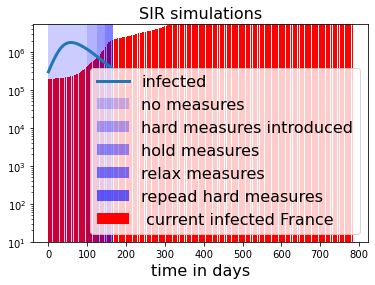

In [27]:
fig, ax1 = plt.subplots(1, 1)

ax1.plot(propagation_rates.index,propagation_rates.infected,label='infected',linewidth=3)

t_phases=np.array([t_initial,t_intro_measures,t_hold,t_relax]).cumsum()
ax1.bar(np.arange(len(ydata)),ydata, width=0.8,label=' current infected France',color='r')
ax1.axvspan(0,t_phases[0], facecolor='b', alpha=0.2,label='no measures')
ax1.axvspan(t_phases[0],t_phases[1], facecolor='b', alpha=0.3,label='hard measures introduced')
ax1.axvspan(t_phases[1],t_phases[2], facecolor='b', alpha=0.4,label='hold measures')
ax1.axvspan(t_phases[2],t_phases[3], facecolor='b', alpha=0.5,label='relax measures')
ax1.axvspan(t_phases[3],len(propagation_rates.infected), facecolor='b', alpha=0.6,label='repead hard measures')

ax1.set_ylim(10, 3*max(propagation_rates.infected))
ax1.set_yscale('log')
ax1.set_title('SIR simulations',size=16)
ax1.set_xlabel('time in days',size=16)
ax1.legend(loc='best',
           prop={'size': 16});

In [28]:
time_idx = data_1.columns[4:]
sir_plot = pd.DataFrame({'date':time_idx})
sir_plot.head()

,date
0,1/22/20
1,1/23/20
2,1/24/20
3,1/25/20
4,1/26/20


In [29]:
country_name = data_1['Country/Region'].unique()

In [30]:
for each in country_name:
    sir_plot[each] =np.array(data_1[data_1['Country/Region']==each].iloc[:,4::].sum(axis=0))

C:\Users\TEMP.DESKTOP-IITHEH3.064\AppData\Local\Temp\ipykernel_11924\2988432032.py:2: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  sir_plot[each] =np.array(data_1[data_1['Country/Region']==each].iloc[:,4::].sum(axis=0))
C:\Users\TEMP.DESKTOP-IITHEH3.064\AppData\Local\Temp\ipykernel_11924\2988432032.py:2: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  sir_plot[each] =np.array(data_1[data_1['Country/Region']==each].iloc[:,4::].sum(axis=0))
C:\Users\TEMP.DESKTOP-IITHEH3.064\AppData\Local\Temp\ipykernel_11924\2988432032.py:2: Perfor

C:\Users\TEMP.DESKTOP-IITHEH3.064\AppData\Local\Temp\ipykernel_11924\2988432032.py:2: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  sir_plot[each] =np.array(data_1[data_1['Country/Region']==each].iloc[:,4::].sum(axis=0))
C:\Users\TEMP.DESKTOP-IITHEH3.064\AppData\Local\Temp\ipykernel_11924\2988432032.py:2: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  sir_plot[each] =np.array(data_1[data_1['Country/Region']==each].iloc[:,4::].sum(axis=0))
C:\Users\TEMP.DESKTOP-IITHEH3.064\AppData\Local\Temp\ipykernel_11924\2988432032.py:2: Perfor

C:\Users\TEMP.DESKTOP-IITHEH3.064\AppData\Local\Temp\ipykernel_11924\2988432032.py:2: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  sir_plot[each] =np.array(data_1[data_1['Country/Region']==each].iloc[:,4::].sum(axis=0))
C:\Users\TEMP.DESKTOP-IITHEH3.064\AppData\Local\Temp\ipykernel_11924\2988432032.py:2: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  sir_plot[each] =np.array(data_1[data_1['Country/Region']==each].iloc[:,4::].sum(axis=0))
C:\Users\TEMP.DESKTOP-IITHEH3.064\AppData\Local\Temp\ipykernel_11924\2988432032.py:2: Perfor

C:\Users\TEMP.DESKTOP-IITHEH3.064\AppData\Local\Temp\ipykernel_11924\2988432032.py:2: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  sir_plot[each] =np.array(data_1[data_1['Country/Region']==each].iloc[:,4::].sum(axis=0))
C:\Users\TEMP.DESKTOP-IITHEH3.064\AppData\Local\Temp\ipykernel_11924\2988432032.py:2: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  sir_plot[each] =np.array(data_1[data_1['Country/Region']==each].iloc[:,4::].sum(axis=0))
C:\Users\TEMP.DESKTOP-IITHEH3.064\AppData\Local\Temp\ipykernel_11924\2988432032.py:2: Perfor

C:\Users\TEMP.DESKTOP-IITHEH3.064\AppData\Local\Temp\ipykernel_11924\2988432032.py:2: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  sir_plot[each] =np.array(data_1[data_1['Country/Region']==each].iloc[:,4::].sum(axis=0))
C:\Users\TEMP.DESKTOP-IITHEH3.064\AppData\Local\Temp\ipykernel_11924\2988432032.py:2: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  sir_plot[each] =np.array(data_1[data_1['Country/Region']==each].iloc[:,4::].sum(axis=0))
C:\Users\TEMP.DESKTOP-IITHEH3.064\AppData\Local\Temp\ipykernel_11924\2988432032.py:2: Perfor

In [31]:
sir_plot.head()

,date,Afghanistan,Albania,Algeria,Andorra,Angola,Antarctica,Antigua and Barbuda,Argentina,Armenia,...,Uruguay,Uzbekistan,Vanuatu,Venezuela,Vietnam,West Bank and Gaza,Winter Olympics 2022,Yemen,Zambia,Zimbabwe
0,1/22/20,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1/23/20,0,0,0,0,0,0,0,0,0,...,0,0,0,0,2,0,0,0,0,0
2,1/24/20,0,0,0,0,0,0,0,0,0,...,0,0,0,0,2,0,0,0,0,0
3,1/25/20,0,0,0,0,0,0,0,0,0,...,0,0,0,0,2,0,0,0,0,0
4,1/26/20,0,0,0,0,0,0,0,0,0,...,0,0,0,0,2,0,0,0,0,0


In [32]:
sir_plot= sir_plot.drop(columns = ['Taiwan*', 'South Sudan', 'Guyana','Haiti', 'Holy See', 'Honduras', 'Hungary', 'Iceland',
                                   'Iraq', 'Ireland', 'Israel', 'Italy',
       'Jamaica', 'Japan', 'Jordan', 'Kazakhstan', 'Kenya',
       'Korea, South', 'Kosovo','Belgium', 'Belize', 'Benin', 'Bhutan',
       'Bolivia', 'Bosnia and Herzegovina', 'Botswana',
       'Brunei', 'Bulgaria', 'Burkina Faso', 'Burma', 'Burundi',
       'Cabo Verde', 'Cambodia', 'Cameroon', 'Canada',
       'Central African Republic', 'Chad', 'Chile', 'China', 'Colombia',
       'Comoros', 'Congo (Brazzaville)', 'Congo (Kinshasa)', 'Costa Rica',
       "Cote d'Ivoire", 'Croatia', 'Cuba', 'Cyprus', 'Czechia', 'Denmark',
       'Diamond Princess', 'Djibouti', 'Luxembourg', 'MS Zaandam', 'Madagascar', 'Malawi',
       'Malaysia', 'Maldives', 'Mali', 'Malta', 'Mauritania', 'Mauritius',
       'Mexico', 'Moldova', 'Monaco', 'Mongolia', 'Montenegro', 'Morocco',
       'Mozambique', 'Namibia', 'Nepal', 'Netherlands', 'New Zealand',
       'Nicaragua', 'Niger', 'Panama', 'Papua New Guinea', 'Paraguay',
       'Peru', 'Philippines'])

In [33]:
time_idx = [datetime.strptime(each, "%m/%d/%y") for each in sir_plot.date] #to convert all the dates into datetime 
time_str= [each.strftime('%Y-%m-%d') for each in time_idx] #to convert datetime function to string

In [34]:
sir_plot.head()

,date,Afghanistan,Albania,Algeria,Andorra,Angola,Antarctica,Antigua and Barbuda,Argentina,Armenia,...,Uruguay,Uzbekistan,Vanuatu,Venezuela,Vietnam,West Bank and Gaza,Winter Olympics 2022,Yemen,Zambia,Zimbabwe
0,1/22/20,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1/23/20,0,0,0,0,0,0,0,0,0,...,0,0,0,0,2,0,0,0,0,0
2,1/24/20,0,0,0,0,0,0,0,0,0,...,0,0,0,0,2,0,0,0,0,0
3,1/25/20,0,0,0,0,0,0,0,0,0,...,0,0,0,0,2,0,0,0,0,0
4,1/26/20,0,0,0,0,0,0,0,0,0,...,0,0,0,0,2,0,0,0,0,0


In [35]:
df_input = sir_plot.iloc[80:]

In [36]:
df_all = df_input.columns
df_all = list(df_all)

In [37]:
def SIR_model(SIR,beta,gamma):
    S,I,R=SIR
    dS_dt=-beta*S*I/N0          #S*I is the 
    dI_dt=beta*S*I/N0-gamma*I
    dR_dt=gamma*I
    return([dS_dt,dI_dt,dR_dt])

def SIR_model_t(SIR,t,beta,gamma):
    S,I,R=SIR
    dS_dt=-beta*S*I/N0          #S*I is the 
    dI_dt=beta*S*I/N0-gamma*I
    dR_dt=gamma*I
    return dS_dt,dI_dt,dR_dt

#Function defined for optimize curve fit

def fit_odeint(x, beta, gamma):
    return integrate.odeint(SIR_model_t, (S0, I0, R0), t, args=(beta, gamma))[:,1] # we only would like to get dI


In [38]:
for each in df_all[1:]:
    ydata = np.array(df_input[each])
    t = np.arange(len(ydata))
    N0 = 6000000
    
    I0 = ydata[1]
    S0 = N0 - I0
    R0 = 0
    
    popt, pcov = optimize.curve_fit(fit_odeint, t, ydata, maxfev= 40000000)
    perr = np.sqrt(np.diag(pcov))
    
    fitted=fit_odeint(t, *popt).reshape(-1,1)
    df_input[each +'_fitted'] = fitted
    

df_input

C:\Users\TEMP.DESKTOP-IITHEH3.064\AppData\Local\Temp\ipykernel_11924\3647755167.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_input[each +'_fitted'] = fitted
C:\Users\TEMP.DESKTOP-IITHEH3.064\AppData\Local\Temp\ipykernel_11924\3647755167.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_input[each +'_fitted'] = fitted
C:\Users\TEMP.DESKTOP-IITHEH3.064\AppData\Local\Temp\ipykernel_11924\3647755167.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFram

C:\Users\TEMP.DESKTOP-IITHEH3.064\AppData\Local\Temp\ipykernel_11924\3647755167.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_input[each +'_fitted'] = fitted
C:\Users\TEMP.DESKTOP-IITHEH3.064\AppData\Local\Temp\ipykernel_11924\3647755167.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_input[each +'_fitted'] = fitted
C:\Users\TEMP.DESKTOP-IITHEH3.064\AppData\Local\Temp\ipykernel_11924\711971771.py:11: RuntimeWarning: invalid value encountered in double_scalars
  dI_dt=beta*S*I/N0-gamma*I
C:

C:\Users\TEMP.DESKTOP-IITHEH3.064\AppData\Local\Temp\ipykernel_11924\3647755167.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_input[each +'_fitted'] = fitted
C:\Users\TEMP.DESKTOP-IITHEH3.064\AppData\Local\Temp\ipykernel_11924\3647755167.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_input[each +'_fitted'] = fitted
C:\Users\TEMP.DESKTOP-IITHEH3.064\AppData\Local\Temp\ipykernel_11924\711971771.py:11: RuntimeWarning: overflow encountered in double_scalars
  dI_dt=beta*S*I/N0-gamma*I
C:\User

C:\Users\TEMP.DESKTOP-IITHEH3.064\AppData\Local\Temp\ipykernel_11924\3647755167.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_input[each +'_fitted'] = fitted
C:\Users\TEMP.DESKTOP-IITHEH3.064\AppData\Local\Temp\ipykernel_11924\3647755167.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_input[each +'_fitted'] = fitted
C:\Users\TEMP.DESKTOP-IITHEH3.064\AppData\Local\Temp\ipykernel_11924\3647755167.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFram

C:\Users\TEMP.DESKTOP-IITHEH3.064\AppData\Local\Temp\ipykernel_11924\711971771.py:10: RuntimeWarning: overflow encountered in double_scalars
  dS_dt=-beta*S*I/N0          #S*I is the
C:\Users\TEMP.DESKTOP-IITHEH3.064\AppData\Local\Temp\ipykernel_11924\711971771.py:11: RuntimeWarning: overflow encountered in double_scalars
  dI_dt=beta*S*I/N0-gamma*I
C:\Users\TEMP.DESKTOP-IITHEH3.064\anaconda3\lib\site-packages\scipy\integrate\odepack.py:247: ODEintWarning: Illegal input detected (internal error). Run with full_output = 1 to get quantitative information.
  warnings.warn(warning_msg, ODEintWarning)
C:\Users\TEMP.DESKTOP-IITHEH3.064\AppData\Local\Temp\ipykernel_11924\3647755167.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_input[each +'_fi

C:\Users\TEMP.DESKTOP-IITHEH3.064\AppData\Local\Temp\ipykernel_11924\3647755167.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_input[each +'_fitted'] = fitted
C:\Users\TEMP.DESKTOP-IITHEH3.064\AppData\Local\Temp\ipykernel_11924\711971771.py:10: RuntimeWarning: overflow encountered in double_scalars
  dS_dt=-beta*S*I/N0          #S*I is the
C:\Users\TEMP.DESKTOP-IITHEH3.064\AppData\Local\Temp\ipykernel_11924\711971771.py:11: RuntimeWarning: overflow encountered in double_scalars
  dI_dt=beta*S*I/N0-gamma*I
C:\Users\TEMP.DESKTOP-IITHEH3.064\AppData\Local\Temp\ipykernel_11924\711971771.py:12: RuntimeWarning: overflow encountered in double_scalars
  dR_dt=gamma*I
C:\Users\TEMP.DESKTOP-IITHEH3.064\anaconda3\lib\site-packages\scipy\integrate\o

C:\Users\TEMP.DESKTOP-IITHEH3.064\AppData\Local\Temp\ipykernel_11924\3647755167.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_input[each +'_fitted'] = fitted
C:\Users\TEMP.DESKTOP-IITHEH3.064\AppData\Local\Temp\ipykernel_11924\711971771.py:11: RuntimeWarning: overflow encountered in double_scalars
  dI_dt=beta*S*I/N0-gamma*I
C:\Users\TEMP.DESKTOP-IITHEH3.064\AppData\Local\Temp\ipykernel_11924\711971771.py:12: RuntimeWarning: overflow encountered in double_scalars
  dR_dt=gamma*I
C:\Users\TEMP.DESKTOP-IITHEH3.064\anaconda3\lib\site-packages\scipy\integrate\odepack.py:247: ODEintWarning: Illegal input detected (internal error). Run with full_output = 1 to get quantitative information.
  warnings.warn(warning_msg, ODEintWarning)
C:\Users\T

C:\Users\TEMP.DESKTOP-IITHEH3.064\AppData\Local\Temp\ipykernel_11924\3647755167.py:14: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_input[each +'_fitted'] = fitted
C:\Users\TEMP.DESKTOP-IITHEH3.064\AppData\Local\Temp\ipykernel_11924\3647755167.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_input[each +'_fitted'] = fitted
C:\Users\TEMP.DESKTOP-IITHEH3.064\AppData\Local\Temp\ipykernel_11924\3647755167.py:14: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.in

C:\Users\TEMP.DESKTOP-IITHEH3.064\AppData\Local\Temp\ipykernel_11924\3647755167.py:14: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_input[each +'_fitted'] = fitted
C:\Users\TEMP.DESKTOP-IITHEH3.064\AppData\Local\Temp\ipykernel_11924\3647755167.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_input[each +'_fitted'] = fitted
C:\Users\TEMP.DESKTOP-IITHEH3.064\AppData\Local\Temp\ipykernel_11924\3647755167.py:14: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.in

,date,Afghanistan,Albania,Algeria,Andorra,Angola,Antarctica,Antigua and Barbuda,Argentina,Armenia,...,Uruguay_fitted,Uzbekistan_fitted,Vanuatu_fitted,Venezuela_fitted,Vietnam_fitted,West Bank and Gaza_fitted,Winter Olympics 2022_fitted,Yemen_fitted,Zambia_fitted,Zimbabwe_fitted
80,4/11/20,521,433,1825,601,19,0,21,1975,967,...,480.000000,865.000000,0.0,181.000000,262.000000,271.000000,0.0,1.000000,43.000000,14.000000
81,4/12/20,555,446,1914,638,19,0,21,2142,1013,...,483.813411,875.146296,0.0,186.083585,263.130432,274.694823,0.0,1.015950,43.453880,14.135604
82,4/13/20,607,467,1983,646,19,0,23,2208,1039,...,487.627088,885.410864,0.0,191.306361,264.254105,278.440009,0.0,1.032154,43.912231,14.272491
83,4/14/20,665,475,2070,659,19,0,23,2277,1067,...,491.440325,895.795065,0.0,196.671932,265.370842,282.236245,0.0,1.048617,44.375090,14.410672
84,4/15/20,770,494,2160,673,19,0,23,2443,1111,...,495.252405,906.300276,0.0,202.183985,266.480466,286.084226,0.0,1.065342,44.842495,14.550159
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
914,7/24/22,184587,304890,266839,45326,102301,11,8736,9507562,424400,...,0.142301,8557.190939,0.0,0.000121,0.592950,475404.343211,0.0,5711.577710,4.569398,30.061682
915,7/25/22,184819,305123,266916,45326,102301,11,8736,9507562,425365,...,0.140395,8473.018900,0.0,0.000117,0.586903,472747.775321,0.0,5644.100456,4.519329,29.782692
916,7/26/22,185086,306789,267010,45326,102301,11,8741,9507562,425365,...,0.138515,8389.626106,0.0,0.000114,0.580918,470093.474360,0.0,5577.179863,4.469805,29.506160
917,7/27/22,185272,308050,267096,45326,102301,11,8741,9507562,425365,...,0.136659,8307.006329,0.0,0.000111,0.574994,467441.669078,0.0,5510.817937,4.420821,29.232066


In [ ]:
app = dash.Dash(__name__)
# Define the app
fig = go.Figure()

app.layout = html.Div([
    html.H1("SIR Model"),
    html.H4("Please select anyone country"),
    
    dcc.Dropdown(id='country_dropdown_sir',
                options=[ {'label': each,'value':each} for each in df_all[1:]],
                value='France', # which are pre-selected
                multi= False),
    
    dcc.Graph(id = "SIR_model"
    )
])

@app.callback(
    Output('SIR_model', 'figure'),
    [Input('country_dropdown_sir', 'value')])

def SIR_fig(con_input):
    df= df_input
    
    for i in df[1:]:
        data = []
        trace = go.Scatter(x=df.date,
                        y=df[con_input],
                        mode='lines+markers',
                        name = con_input)
        data.append(trace)
        
        trace_fitted = go.Scatter(x=df.date,
                        y=df[con_input +'_fitted'], 
                        mode='lines+markers',
                        name=con_input+'_fitted')
        data.append(trace_fitted)
        
        
            
    return {'data': data,
            'layout' : dict(
                width=1280,
                height=720,
                title= 'SIR model',
                xaxis={'tickangle':-45,
                        'nticks':20,
                        'tickfont':dict(size=14,color="#7f7f7f"),
                      },
                yaxis={'type':"log",
                       'range':'[1.1,5.5]'
                      }
                
            )
        }

if __name__ == '__main__':
    app.run_server(port=4050)

Dash is running on http://127.0.0.1:4050/

 * Serving Flask app "__main__" (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: off


 * Running on http://127.0.0.1:4050/ (Press CTRL+C to quit)
